## CAR CRASHES

### Chalumba Ferguson
              


# Introduction

Car crashes data set is the dataset that is collected to model the percentage of cars' crashes in a given area (case study of 51 states in America). In this data set we shall model the percentage of car crashes depending on various features. We have chosen 7 features out of 8 (all the continuous features) namely alcohol, speeding, not distracted, ins_premium, ins_losses, previous crashes and total. The response here is now going to be the percentatage of car crashes recorded by year per state.  The predictors will measure the alkalinity of a given feature on the response.

In this dataset, we shall use two approaches both on linear regression since our features are continuous. These approaches are  linear_model.Ridge Regression approach and compare with the results obtained from Linear Regression approach. 

# Importing packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pandas.plotting import scatter_matrix
import warnings

warnings.filterwarnings("ignore")

# Loading the dataset "car_crashes.csv"

In [ ]:
car = sns.load_dataset('car_crashes')
car

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


## Renaming the features for easy identification and understanding of the dataset

In [ ]:
features = ["num_driver_fatal", "percent_speeding", "percent_alcohol", "percent_not_dis", "percent_no_prev", "insur_prem", "loss_per_insur_driver", "state"]
car = car.rename(columns=dict(zip(car.columns,features)))
car

,num_driver_fatal,percent_speeding,percent_alcohol,percent_not_dis,percent_no_prev,insur_prem,loss_per_insur_driver,state
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


## Checking the nature of features (continuous, categorical) and missing values 

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_driver_fatal       51 non-null     float64
 1   percent_speeding       51 non-null     float64
 2   percent_alcohol        51 non-null     float64
 3   percent_not_dis        51 non-null     float64
 4   percent_no_prev        51 non-null     float64
 5   insur_prem             51 non-null     float64
 6   loss_per_insur_driver  51 non-null     float64
 7   state                  51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


## According to the output above, we have 7 continuous features : 
1. num_driver_fatal
2. percent_speeding
3. percent_alcohol
3. percent_not_dis
4. percent_no_prev
5. insur_prem
6. loss_per_insur_driver

## And 1 categorical feature : state
## No missing values in dataset

# Plotting all distributions of continuous features

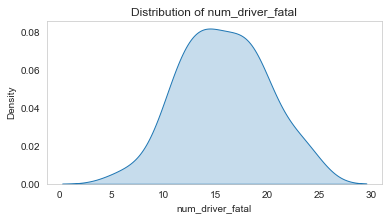

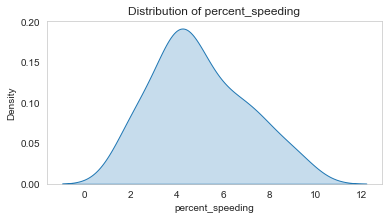

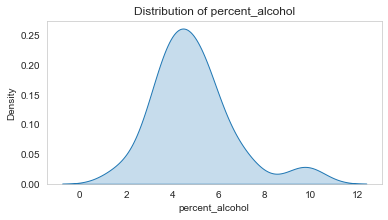

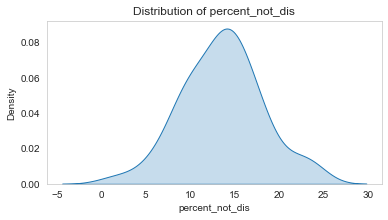

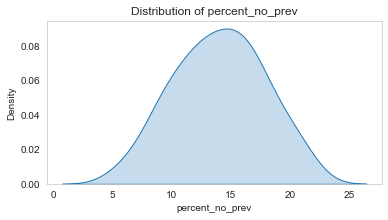

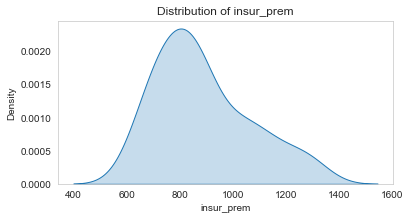

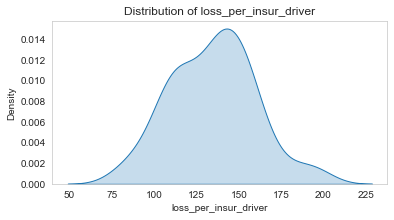

In [ ]:
sns.set_style("whitegrid", {'grid.color': '1', "xtick.color":'.16'})

def plot_dist(df, cont_features):
    for f in cont_features:
        plt.figure(figsize=(6,3))
        sns.kdeplot(df[f], legend=False, shade=True)
        plt.title("Distribution of "+f)
        plt.show()
        
plot_dist(car, features[:-1])

# Correlations between continuous features

In [ ]:
cormat = car[features[:-1]].corr()    #select continuous features (all expect the last)
cormat

,num_driver_fatal,percent_speeding,percent_alcohol,percent_not_dis,percent_no_prev,insur_prem,loss_per_insur_driver
num_driver_fatal,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
percent_speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
percent_alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
percent_not_dis,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
percent_no_prev,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
insur_prem,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
loss_per_insur_driver,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


## Visualize using heatmap

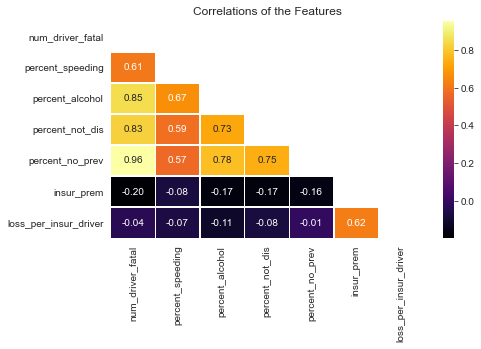

In [ ]:
plt.figure(figsize=(7, 4)) 
plt.title("Correlations of the Features")
mask = np.zeros_like(cormat)
mask[np.triu_indices_from(mask)] = True
sns.axes_style("white")
ax = sns.heatmap(cormat, annot=True, fmt=".2f", linewidths=.5, mask=mask, cmap="inferno")
plt.show()

### From above graphs we observe that there is small colerration between speeding and total average number of car_crashes while total average number of car_crashes and no_previous are highly colerrated  

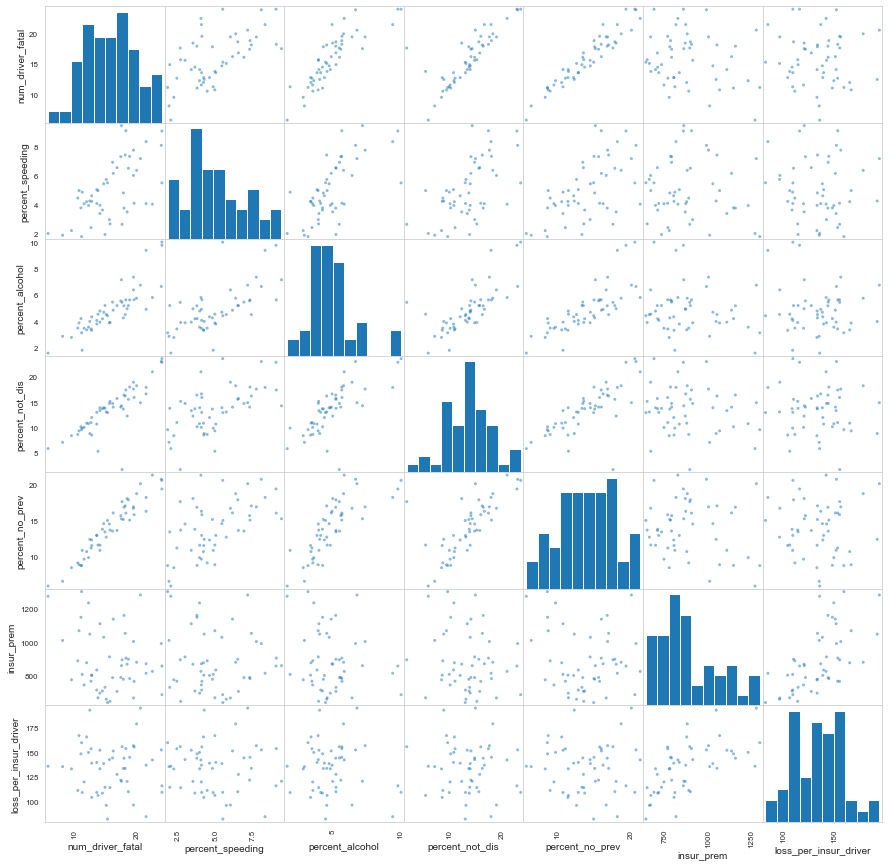

In [ ]:
scatter_matrix(car[features[:-1]], figsize = (15, 15))
plt.show()

The figure above represent the correlation between  our predictor variables and responce variable for instance the scatter plot of percentage of drivers in car crashes against percentage of drivers speeding is nonlinear. However, the scatter plot of percentage of drivers in car crashes against percentage of drivers who were drinking alcohol,not_distracted and had no_previous record of car crashes are linearly carrelated.percentage of the total fatal accidents caused. Therefore, one can not that "Speed kills. But it is definitely a factor for crashes in most states."!

In [ ]:
car[features[:-1]].cov()

,num_driver_fatal,percent_speeding,percent_alcohol,percent_not_dis,percent_no_prev,insur_prem,loss_per_insur_driver
num_driver_fatal,16.990902,5.086338,6.076992,15.381048,14.837975,-146.768484,-3.686589
percent_speeding,5.086338,4.071303,2.336617,5.349704,4.344815,-27.943987,-3.303815
percent_alcohol,6.076992,2.336617,2.989901,5.713491,5.100416,-52.599326,-4.833276
percent_not_dis,15.381048,5.349704,5.713491,20.330874,12.685394,-140.572871,-8.507441
percent_no_prev,14.837975,4.344815,5.100416,12.685394,14.172755,-105.312296,-0.594528
insur_prem,-146.768484,-27.943987,-52.599326,-140.572871,-105.312296,31789.565170,2759.254746
loss_per_insur_driver,-3.686589,-3.303815,-4.833276,-8.507441,-0.594528,2759.254746,616.823046


# Top 10 states of all continuous features

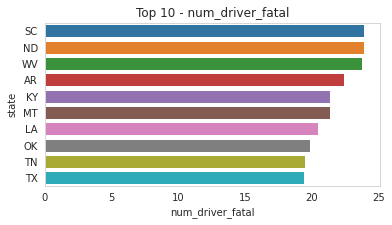

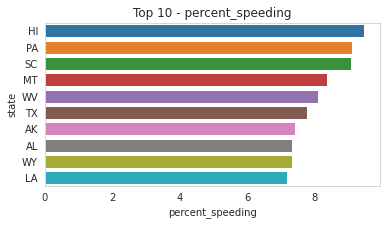

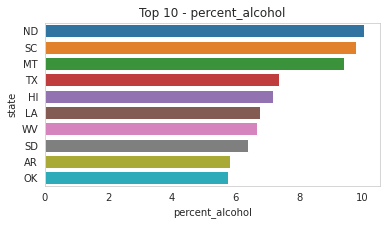

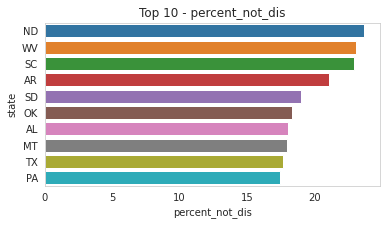

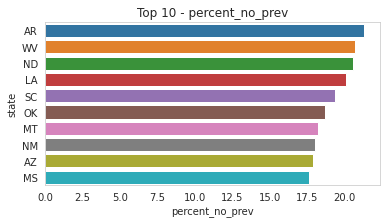

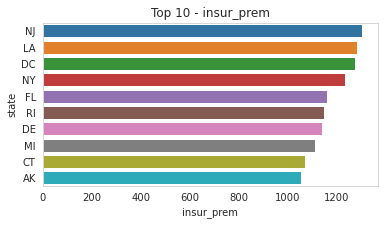

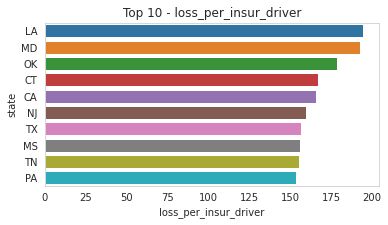

In [ ]:
def top_10(df, features):
    for f in features:
        l = df[["state",f]].sort_values(by=f,ascending=False).head(10)
        plt.figure(figsize=(6,3))
        sns.barplot(y="state", x=f, data=l)
        plt.title("Top 10 - "+f)
        plt.show()

top_10(car, features[:-1])

## Deductions 
1. South Carolina (SC), North Dakota(ND) and West Virginia (WV)have the most number of fatal collisions per billion miles of travel.
2. The state with the largest proportion of fatal collisions due to speeding was Hawaii(HI), closely followed by Pennysylvania.
3. North Dakota (ND) has the highest proportion of inebriated drivers causing fatal colissions.
4. Texas (TX) is present within the top 10 states in all the 3 main features related to collisions (number per billion miles, proportion that was speeding and proportion that was under the influence of alcohol)
5. The drivers of New Jersey (NJ) paid the highest amounts of car insurance premiums , followed by Louisiana (LA)and the District of Columbia (DC). 

# Machine Learning

### Extracting X and Y

In [ ]:
X = car.iloc[:,1:-1]
y = car['num_driver_fatal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Training the Algorithm with Ridge model

In [ ]:
multreg = linear_model.Ridge(alpha = 0.5)
multreg.fit(X_train, y_train)

Ridge(alpha=0.5)

### Predict the total number of fatal driver

In [ ]:
y_pred = multreg.predict(X_test)

### Parameter $\beta$ of the model

In [ ]:
beta =  multreg.intercept_, multreg.coef_
beta

(1.6373298326319468,
 array([-0.00594503,  0.45242177,  0.1615611 ,  0.74413017, -0.00149486,
         0.00521223]))

Regression coefficients are estimates of the unknown population parameters and describe the relationship between a predictor variable and the response. In linear regression, coefficients are the values that multiply the predictor values. 
A positive sign indicates that as the predictor variable increases, the response variable also increases.
A negative sign indicates that as the predictor variable increases, the response variable decreases.
For instance the negative sign on the percentage of drivers speeding feature shows that as the predictor speed increases by a unit the response- percentages of drivers involved in car crashes reduces by 0.0.0059.
As percentage of drivers  distracted increases by a unit crashes percentages of car crashes  also  increase by 0.4524.
As percentage of drivers with previous cases  increases by a unit crashes percentages of car crashes  also increase by 0.1615.

## Plotting predicted values and exact values

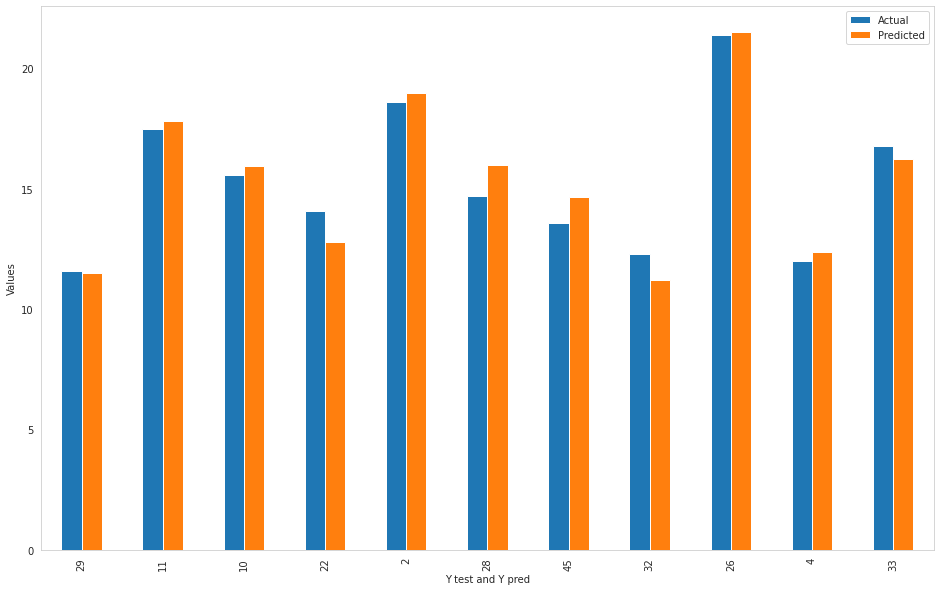

In [ ]:
Dict=pd.DataFrame({'Actual':y_test,"Predicted":y_pred})
pt=Dict.plot(kind='bar',figsize=(16,10))
pt.set(xlabel='Y test and Y pred',ylabel='Values')
plt.show()

From the graph we can observe that the values of the y test and the y pred are not so far apart and would suggest that the model would be used to fit data.

### Errors of the model

In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6373881392360953
Mean Squared Error: 0.6019758757281839
Root Mean Squared Error: 0.7758710432334641


The errors from our model are: absolute error of  0.649, squared error of 0.570 and root mean squared error of 0.755

## Linear Regression Model

In [ ]:
X = car.iloc[:,1:-1]
y = car['num_driver_fatal']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

# Create linear regression
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

In [ ]:
print('Coefficients: \n', multreg.coef_)
print('Intercept: \n', multreg.intercept_)

Coefficients: 
 [-0.00594503  0.45242177  0.1615611   0.74413017 -0.00149486  0.00521223]
Intercept: 
 1.6373298326319468


The results obtained by this model and the previous model that factors in maximization are the same.

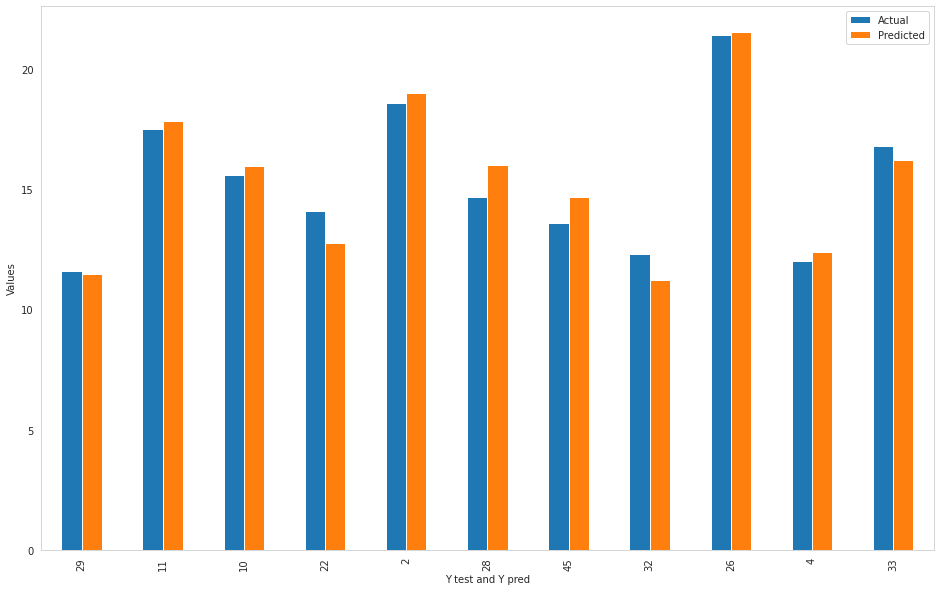

In [ ]:
Dict=pd.DataFrame({'Actual':y_test,"Predicted":y_pred})

#sns.barplot(data=Dict,hue='abbrev')
pt=Dict.plot(kind='bar',figsize=(16,10))
pt.set(xlabel='Y test and Y pred',ylabel='Values')
plt.show()

The results from above show that the model did make a good prediction of the number of crashes that would have been recorded in the states.